# **About this Project**

I created this project as part of the course "100 Days of Coding: The Complete Python Bootcamp".
Hence the older dates of the data, I will update to the newest available data soon.

Google Trends gives estimates of search volume. In this project, I explored if search popularity relates to other kinds of data.

This is a first analysis purely based on the visualization of the data.

Questions I asked:


*   Are there patterns in Google's search volume and the price of Bitcoin?
*   Are there patterns in Google's search volume and the Tesla stock price?
*   Can the search volume for the term "Unemployment Benefits" tell us something about the actual employment rate?


Not shown in this Notebook is the pre-processing of data.
For the files "TESLA Search Trend vs Price.csv" and "UE Benefits Search vs UE Rate 2004-20.csv" I used Excel for the pre-processing: I converted both, the Google search volume and the Stock Price / Unemployment Rate to monthly datapoints and combined the data in one file. 
For all data regarding Bitcoin, I show this process in this Notebook, using Python.


Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>


*About Google Trend Search
The Google Trends data is not the amount of actual search requests during a given time. It is normalized to a 0-100 index, where 0 means no search or very few searches, while 100 is the peak of the searches. It is an index for relative popularity over the given time frame.
The data therefore does not say anything about the actual number of searches, it simply tells us when it peaked and had the most searches (or not).

**Import Statements**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

**Read Data**

In [3]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

# Data Exploration

Initial exploration to understand the underlying data

### Tesla

In [4]:
df_tesla.shape

(124, 3)

In [58]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MONTH            124 non-null    object 
 1   TSLA_WEB_SEARCH  124 non-null    int64  
 2   TSLA_USD_CLOSE   124 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB


Printing first and last 5 rows to check time period of data

In [5]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [8]:
df_tesla.tail()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007
123,2020-09-01,31,407.339996


In [6]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

Using the describe method to get the basic descpriptive statistics of the data, 
e.g. min and max

In [23]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [24]:
df_unemployment.shape

(200, 3)

In [59]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MONTH                   200 non-null    object 
 1   UE_BENEFITS_WEB_SEARCH  200 non-null    int64  
 2   UNRATE                  200 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


Printing first and last 5 rows to check time period of data

In [25]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [30]:
df_unemployment.tail()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
195,2020-04,100,14.7
196,2020-05,63,13.3
197,2020-06,53,11.1
198,2020-07,54,10.2
199,2020-08,50,8.4


In [26]:
df_unemployment.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

Using the describe method to get the basic descpriptive statistics of the data, e.g. min and max

In [34]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,200.000000,200.000000
mean,10.315000,6.173000
std,10.778061,2.128267
min,4.000000,3.500000
25%,5.000000,4.600000
50%,7.000000,5.400000
75%,12.000000,7.825000
max,100.000000,14.700000


### Bitcoin

In [35]:
df_btc_search.shape

(73, 2)

In [39]:
df_btc_price.shape

(2204, 3)

In [60]:
df_btc_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MONTH            73 non-null     object
 1   BTC_NEWS_SEARCH  73 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [61]:
df_btc_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2203 entries, 0 to 2203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2203 non-null   object 
 1   CLOSE   2203 non-null   float64
 2   VOLUME  2203 non-null   float64
dtypes: float64(2), object(1)
memory usage: 68.8+ KB


Printing first and last 5 rows to check time period of data

In [36]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [37]:
df_btc_search.tail()

,MONTH,BTC_NEWS_SEARCH
68,2020-05,22
69,2020-06,13
70,2020-07,14
71,2020-08,16
72,2020-09,13


In [40]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [41]:
df_btc_price.tail()

,DATE,CLOSE,VOLUME
2199,2020-09-24,10745.548828,2.301754e+10
2200,2020-09-25,10702.290039,2.123255e+10
2201,2020-09-26,10754.437500,1.810501e+10
2202,2020-09-27,10774.426758,1.801688e+10
2203,2020-09-28,10912.536133,2.122653e+10


In [38]:
df_btc_search.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [42]:
df_btc_price.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

Using the describe method to get the basic descpriptive statistics of the data, e.g. min and max

In [43]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [45]:
df_btc_price.describe()

,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


*Problem: the data in the Dataframe df_btc_price has day-periodicity, while df_btc_search has a month-periodicity*

# Data Cleaning

### Check for Missing Values

In [47]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False
Missing values for BTC price?: True


In [50]:
print(f'Number of missing values for BTC price: {df_btc_price.isna().values.sum()}')

Number of missing values for BTC price: 2


In [55]:
# as the I am only interested in the stock price, I am only examining the missing value for the CLOSE column
# though it turns out in this case, it is the same row as the second NaN value
df_btc_price[df_btc_price["CLOSE"].isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


Removing the NaN value

In [56]:
df_btc_price.dropna(inplace=True)

In [57]:
df_btc_price.isna().values.any()

False

### Convert Strings to DateTime Objects

In [62]:
# in data exploration, using the info method, it became clear that all date columns are strings
#  therefore I am converting these into DateTime objects
df_tesla["MONTH"] = pd.to_datetime(df_tesla["MONTH"])
df_unemployment["MONTH"] = pd.to_datetime(df_unemployment["MONTH"])
df_btc_search["MONTH"] = pd.to_datetime(df_btc_search["MONTH"])
df_btc_price["DATE"] = pd.to_datetime(df_btc_price["DATE"])

In [71]:
# just double checking
print(df_tesla[["MONTH"]].dtypes)
print(df_unemployment[["MONTH"]].dtypes)
print(df_btc_search[["MONTH"]].dtypes)
print(df_btc_price[["DATE"]].dtypes)

MONTH    datetime64[ns]
dtype: object
MONTH    datetime64[ns]
dtype: object
MONTH    datetime64[ns]
dtype: object
DATE    datetime64[ns]
dtype: object


### Converting from Daily to Monthly Data

In [72]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()

In [73]:
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 2)


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualization

### Unemployement Benefits Search vs Actual Unemployment in the U.S.

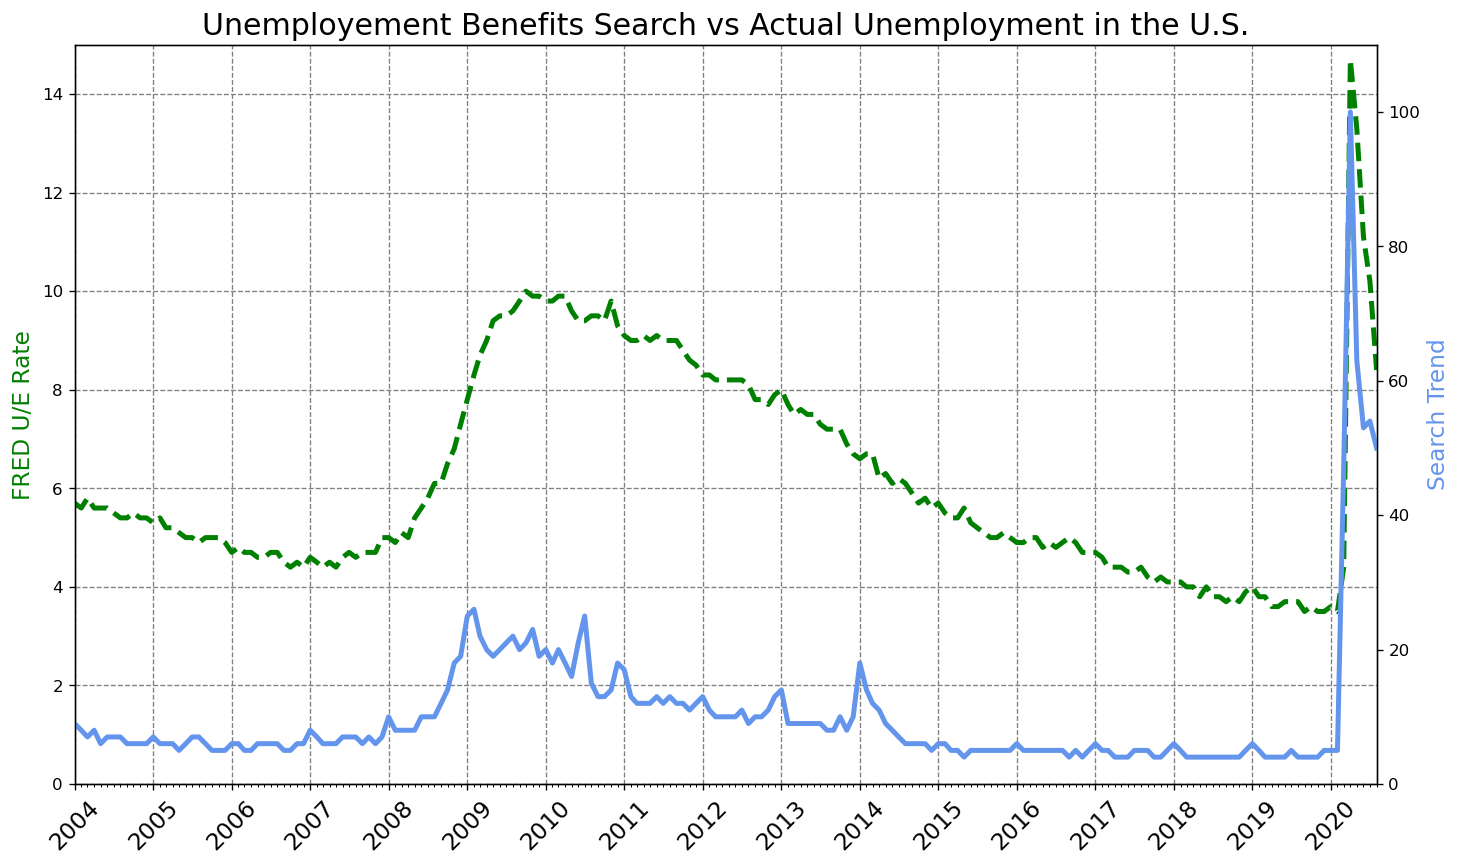

In [89]:
plt.figure(figsize=(14,8),dpi=120)
plt.title("Unemployement Benefits Search vs Actual Unemployment in the U.S.", fontsize=18)
plt.grid(color="grey", linestyle="--")

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("FRED U/E Rate", color="green", fontsize=14)
ax2.set_ylabel("Search Trend", color="cornflowerblue", fontsize=14)

ax1.set_xlim(df_unemployment.MONTH.min(), df_unemployment.MONTH.max())
ax1.set_ylim(0,15)
ax2.set_ylim(0,110)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color="green", linewidth=3, linestyle="--")
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color="cornflowerblue",linewidth=3)

plt.show()

We can see that the lines are following a similar pattern. 
The spike in Unemployment Rate starting in 2008 can be explained by the financial crisis.
The spike in Google Searches in late 2013 and early 2014 seems to be random, however, a quick search showed, that Congress failed to renew the Emergency Unemployment Compensation program. So I assume that Unemployment Benefits were all over the news and likely heightened the awareness and searches for it.
The spike in 2020 for both is of course explained by the Covid-19 pandemic. 

### Tesla Stock Price vs Search Volume

Plotting the Tesla stock price against the Tesla search volume using a line chart and two different axes.

In [79]:
# create locators for ticks on the timeline
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

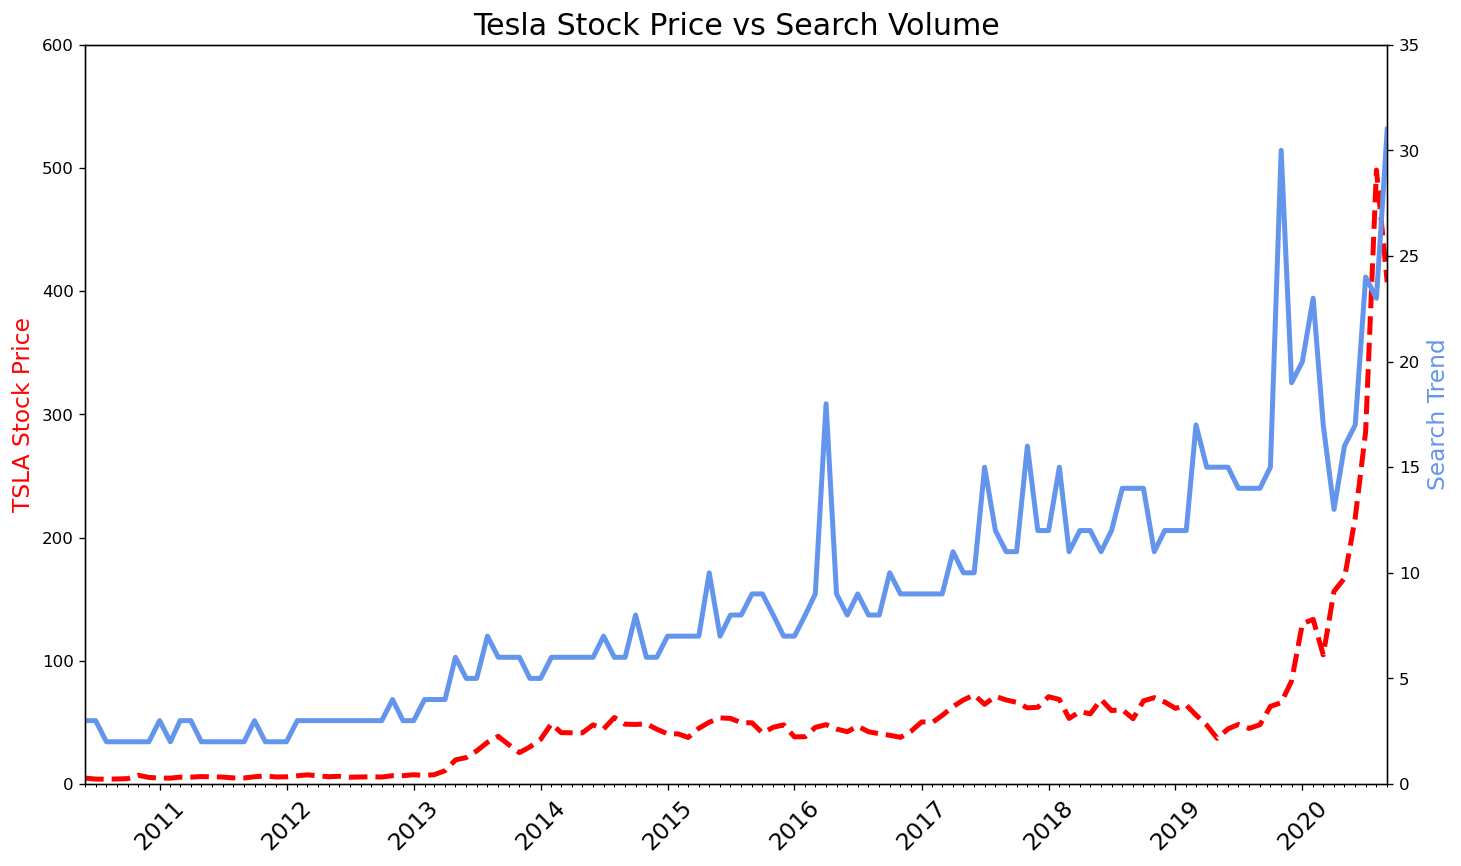

In [84]:
plt.figure(figsize=(14,8),dpi=120)
plt.title("Tesla Stock Price vs Search Volume", fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA Stock Price", color="red", fontsize=14)
ax2.set_ylabel("Search Trend", color="cornflowerblue", fontsize=14)

ax1.set_ylim(0, 600)
ax1.set_xlim(df_tesla.MONTH.min(), df_tesla.MONTH.max())
ax2.set_ylim(0,35)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="red", linewidth=3, linestyle="--")
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="cornflowerblue",linewidth=3)

plt.show()

There is a very slight similar trend, however, the Search Trend is a lot more fluctuating than the Stock Price.
Which suggests that the Stock Price is less influenced by the news than the search results are.
For example, the spike in searches in March 2016 is most likely a result of the announcement of the new Model 3, while the Cybertruck was announced in November 2019.
In late 2020 we can see, that the spike in stock price started first and likely caused the spike in Google searches.

### Bitcoin (BTC) Price vs Search Volume

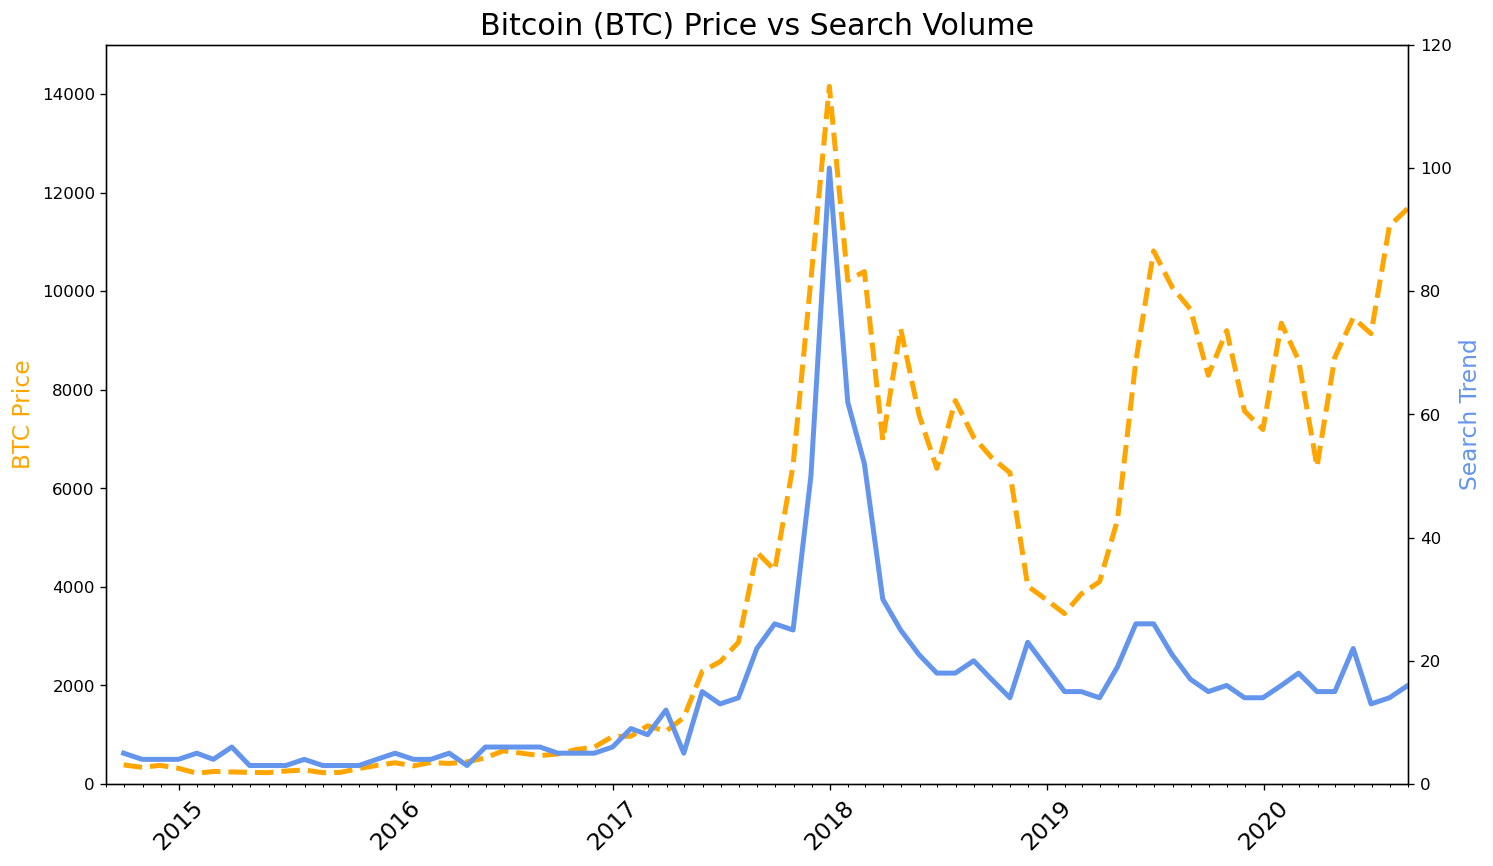

In [103]:
plt.figure(figsize=(14,8),dpi=120)
plt.title("Bitcoin (BTC) Price vs Search Volume", fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("BTC Price", color="orange", fontsize=14)
ax2.set_ylabel("Search Trend", color="cornflowerblue", fontsize=14)

ax1.set_ylim(0, 15000)
ax1.set_xlim(df_btc_search.MONTH.min(), df_btc_search.MONTH.max())
ax2.set_ylim(0,120)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color="orange", linewidth=3, linestyle="--")
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color="cornflowerblue",linewidth=3)

plt.show()

The trendlines for Bitcoin Price and Google Search seem to follow a very similar pattern. The popularity in early 2018 caused a spike in price and also in search, the trendline suggests, that the price went up first. Later spikes in Price are still accompanied by spikes in Google Search however less pronounced. I assume by then, most people knew what Bitcoin is and there were less purely informative searches. 